In [1]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
enemies = 2
crossover_mode = 'arithmetic'

In [7]:
df_list = []
#lengte range aanpassen naar aantal runs
for i in range(10):
    df_list.append(pd.read_csv("individual_task1/results_{}_{}_{}.txt".format(enemies,i, crossover_mode), sep=" ", index_col=0))

df = pd.concat(df_list)
df

,best,mean,std
gen,,,
0,91.843172,3.740024,22.682127
1,91.843172,11.867995,28.572803
2,91.843172,23.714712,35.587594
3,91.858736,34.151407,38.045723
4,91.858736,39.756971,37.095708


In [8]:
mean_of_means = np.array(df.groupby(df.index)['mean'].mean())
sd_of_means = np.array(df.groupby(df.index)['mean'].std())
mean_of_bests = np.array(df.groupby(df.index)['best'].mean())
sd_of_bests = np.array(df.groupby(df.index)['best'].std())
gen_nums = np.arange(len(mean_of_means))

In [9]:
df_plot = pd.DataFrame({'mean_of_means': mean_of_means, 'sd_of_means': sd_of_means, 'mean_of_bests': mean_of_bests, 'sd_of_bests': sd_of_bests})

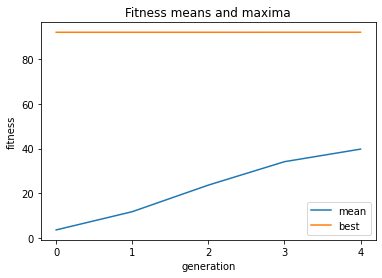

In [10]:
lb_mean = mean_of_means - sd_of_means
ub_mean = mean_of_means + sd_of_means
lb_best = mean_of_bests - sd_of_bests
ub_best = mean_of_bests + sd_of_bests

fig, ax = plt.subplots()
ax.plot(df_plot['mean_of_means'], label='mean')
ax.plot(df_plot['mean_of_bests'], label='best')

plt.fill_between(gen_nums, lb_mean, ub_mean, alpha=.3, color="blue")
plt.fill_between(gen_nums, lb_best, ub_best, alpha=.3, color="orange")
plt.xticks(gen_nums)
ax.set_xlabel("generation")
ax.set_ylabel("fitness")
ax.set_title("Fitness means and maxima")
ax.legend()
plt.show()

In [11]:
best_individuals = []
for i in range(len(df_list)):
    best_individuals.append(df_list[i]['best'].max())
    
best_individuals

[91.858736]

In [15]:
box_dfs = []
mean = []
#lengte range aanpassen naar aantal runs
for i in range(10):
    box_dfs.append(pd.read_csv("individual_task1/boxplot_{}_{}_{}.txt".format(enemies,i, crossover_mode), sep="\n", header=None))

data = pd.concat(box_dfs, axis = 1)
data

,0
0,74
1,74
2,76
3,76
4,74


In [16]:
means = data.mean()
means

0    74.8
dtype: float64

Text(0.5, 1.0, 'Boxplot of best individual enemy 2')

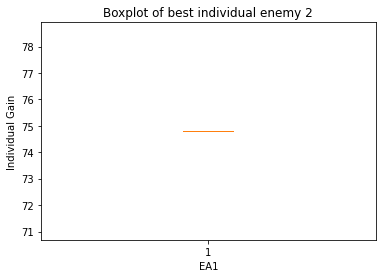

In [17]:
fig, ax = plt.subplots()
ax.boxplot(means)
ax.set_xlabel("EA1")
ax.set_ylabel("Individual Gain")
ax.set_title("Boxplot of best individual enemy {}".format(2))

<AxesSubplot:>

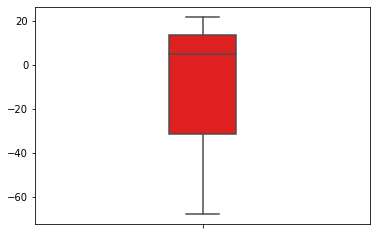

In [271]:
sns.boxplot(means, color="red", orient='v', width=0.2)